# Pytorch Tutorial from OpenCV

In [1]:
# Download some digit images from MNIST dataset
!wget -q "https://learnopencv.com/wp-content/uploads/2024/07/mnist_0.jpg" -O "mnist_0.jpg"
!wget -q "https://learnopencv.com/wp-content/uploads/2024/07/mnist_1.jpg" -O "mnist_1.jpg"

In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [3]:
print("torch version : {}".format(torch.__version__))

torch version : 2.6.0+cu124


- Tensors: In PyTorch, tensors are multi-dimensional arrays similar to NumPy arrays, but with additional capabilities for GPU acceleration and automatic differentiation. Tensors are the fundamental building blocks for representing data and parameters in neural networks.
- Batches: Batching is a technique where multiple data samples (images, in this case) are grouped together into a single tensor. This allows efficient processing of multiple samples simultaneously, to take advantage of the parallel processing capabilities of modern hardware.

| Tensor Rank | Example               | Shape          |
| ----------- | --------------------- | -------------- |
| 0 (Scalar)  | `42`                  | `()`           |
| 1 (Vector)  | `[1.0, 2.0, 3.0]`     | `(3,)`         |
| 2 (Matrix)  | `[[1, 2], [3, 4]]`    | `(2, 2)`       |
| 3+ (Tensor) | Batch of images, etc. | `(B, C, H, W)` |


| Symbol | Meaning                                                        | Example for an RGB Image    |
| ------ | -------------------------------------------------------------- | --------------------------- |
| `B`    | **Batch size** – number of images in one pass                  | `32` images in a mini-batch |
| `C`    | **Channels** – color channels (`1` for grayscale, `3` for RGB) | `3`                         |
| `H`    | **Height** – image height in pixels                            | `224`                       |
| `W`    | **Width** – image width in pixels                              | `224`                       |



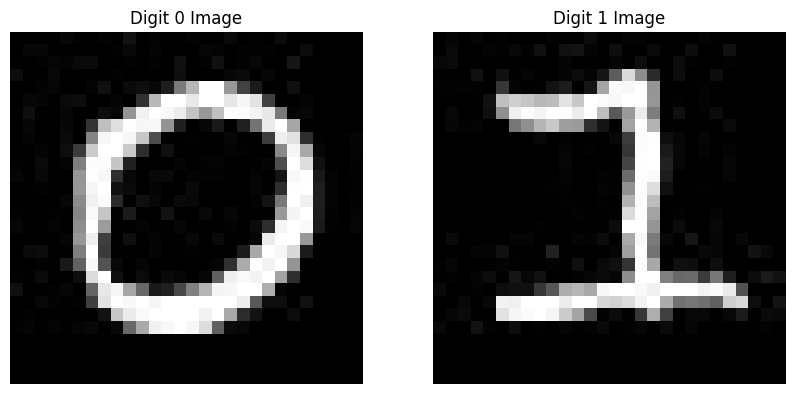

Image array shape:  (28, 28, 3)
Min pixel value:0 ; Max pixel value : 255
Gray Image array shape:  (28, 28)


In [4]:
# Show images

digit_0_array_og = cv2.imread("mnist_0.jpg")
digit_1_array_og = cv2.imread("mnist_1.jpg")

digit_0_array_gray = cv2.imread("mnist_0.jpg",cv2.IMREAD_GRAYSCALE )
digit_1_array_gray = cv2.imread("mnist_1.jpg",cv2.IMREAD_GRAYSCALE )

# Visualize the image

fig, axs = plt.subplots(1,2, figsize=(10,5))


axs[0].imshow(digit_0_array_og, cmap='gray',interpolation='none')
axs[0].set_title("Digit 0 Image")
axs[0].axis('off')

axs[1].imshow(digit_1_array_og, cmap="gray", interpolation = 'none')
axs[1].set_title("Digit 1 Image")
axs[1].axis('off')

plt.show()

#Numpy array with three channels
print("Image array shape: ",digit_0_array_og.shape)
print(f"Min pixel value:{np.min(digit_0_array_og)} ; Max pixel value : {np.max(digit_0_array_og)}")
print("Gray Image array shape: ",digit_0_array_gray.shape)

Shape of Normalised Digit 0 Tensor:  torch.Size([28, 28, 3])
Normalised Min pixel value: 0.0 ; Normalised Max pixel value : 1.0


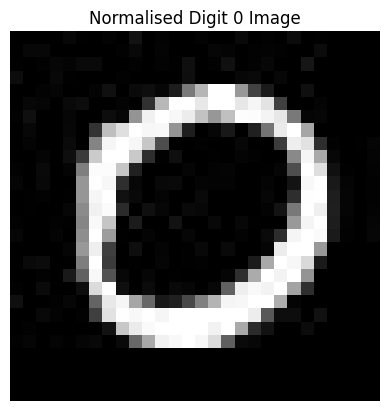

In [5]:
# Convert the images to PyTorch tensors and normalize
img_tensor_0 = torch.tensor(digit_0_array_og, dtype=torch.float32) / 255.0
img_tensor_1 = torch.tensor(digit_1_array_og, dtype=torch.float32) / 255.0

print("Shape of Normalised Digit 0 Tensor: ", img_tensor_0.shape)
print(f"Normalised Min pixel value: {torch.min(img_tensor_0)} ; Normalised Max pixel value : {torch.max(img_tensor_0)}")

plt.imshow(img_tensor_0,cmap="gray")
plt.title("Normalised Digit 0 Image")
plt.axis('off')
plt.show()

___
## Creating Batch

In [6]:
batch_tensor = torch.stack([img_tensor_0, img_tensor_1])

# In PyTorch the forward pass of input images to the model is expected to have a batch_size > 1
print("Batch Tensor Shape:", batch_tensor.shape)
print("Format [Batch number, H, W, Channel]")

# But Torch generally use the format (B, C, H, W)


Batch Tensor Shape: torch.Size([2, 28, 28, 3])
Format [Batch number, H, W, Channel]


Additionally in PyTorch, image tensors typically follow the shape convention [N ,C ,H ,W] unlike tensorflow which follows [N, H, W, C].

batch_input = batch_tensor.permute(0,3,1,2)

| Old Index | Meaning | New Index | After `.permute` |
| --------- | ------- | --------- | ---------------- |
| `0`       | `B`     | `0`       | Batch stays      |
| `1`       | `H`     | `2`       | Becomes 3rd dim  |
| `2`       | `W`     | `3`       | Becomes 4th dim  |
| `3`       | `C`     | `1`       | Moved to 2nd dim |


In [7]:
batch_input = batch_tensor.permute(0,3,1,2)
print("Batch Tensor Shape:", batch_input.shape)

Batch Tensor Shape: torch.Size([2, 3, 28, 28])


___
# Intro to Tensor and Operations

<img src=https://learnopencv.com/wp-content/uploads/2019/05/PyTorch-Tensors.jpg width = 400 height=350>

Torch tensors are simply data structure like numpy

In [8]:
int_tensor = torch.tensor([[1,2,3],[4,5,6]])
print(int_tensor.dtype)

# What if we changed any one element to floating point number?
int_tensor = torch.tensor([[1,2,3],[4.,5,6]])
print(int_tensor.dtype)
print(int_tensor)

# This can be overridden as follows
float_tensor = torch.tensor([[1, 2, 3],[4., 5, 6]])
int_tensor = float_tensor.type(torch.int64)
print(int_tensor.dtype)
print(int_tensor)

torch.int64
torch.float32
tensor([[1., 2., 3.],
        [4., 5., 6.]])
torch.int64
tensor([[1, 2, 3],
        [4, 5, 6]])


In [9]:
# Tensor to Numpy and Numpy to Tensor

# Tensor to Array
int_tensor_numpy = int_tensor.numpy()
print(int_tensor_numpy)

# Array to Tensor
new_array = np.array([[8,7,6,5],[4,3,2,1]])
converted_tensor = torch.from_numpy(new_array)
print(converted_tensor)

[[1 2 3]
 [4 5 6]]
tensor([[8, 7, 6, 5],
        [4, 3, 2, 1]])


Arrithmetic operations, Broadcasting are similar to numpy

## CUDA / GPU

In [10]:
# Check if CUDA is available

#*****************************************
# Turn ON GPU in Google Colab
#******************************************
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [13]:
# Create a tensor for CPU
# This will occupy CPU RAM
tensor_cpu = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]], device='cpu')

# Create a tensor for GPU
# This will occupy GPU RAM
tensor_gpu = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]], device='cuda')

# Move GPU tensor to CPU
tensor_gpu_cpu = tensor_gpu.to(device='cpu')

# Move CPU tensor to GPU
tensor_cpu_gpu = tensor_cpu.to(device='cuda')